In [3]:
import numpy as np
import matplotlib.pyplot as plt

import scipy.constants as cst
from astropy.stats import gaussian_fwhm_to_sigma
from astropy.cosmology import Planck15 as cosmo

import pandas as pd
from matplotlib.pyplot import cm
import matplotlib.lines as mlines
import matplotlib.patches as mpatches
import matplotlib.markers as mmarkers

In [7]:
R = 250
nu_min = 715 #GHz
nu_max = 1250 #GHz
dec_size= 1 #deg
ra_size = 1 #deg
D = 1.9 #m
freq_CII = 1900.53690000 #GHz


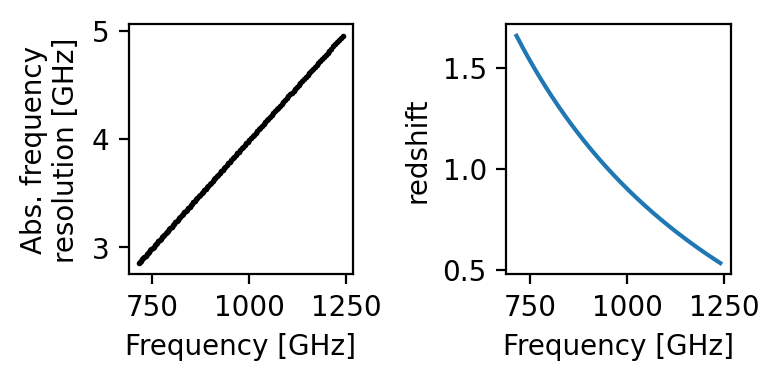

In [40]:
# Logarithmic step size
dlognu = np.log(1 + 1 / R)

# Compute number of channels
n_channels = int(np.floor(np.log(nu_max / nu_min) / dlognu))

# Create log-frequency values
log_nus = np.log(nu_min) + dlognu * np.arange(n_channels)
nu = np.exp(log_nus)  # Center frequencies in Hz
delta_nu = nu * dlognu

fig, (ax,ax1) = plt.subplots(1,2,figsize=(4,2), dpi=200) 
ax.plot(nu,delta_nu, 'ok', markersize=1)
ax.set_xlabel('Frequency [GHz]')
ax.set_ylabel('Abs. frequency\nresolution [GHz]')

z = freq_CII / nu -1
dz = z * delta_nu / nu
ax1.plot(nu,z)
ax1.set_xlabel('Frequency [GHz]')
ax1.set_ylabel('redshift')
fig.tight_layout()

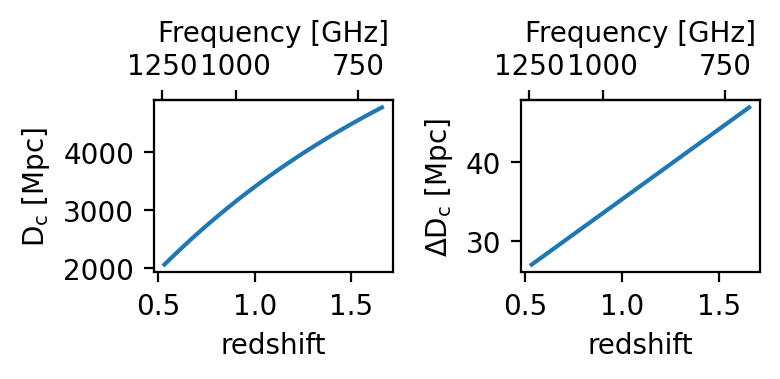

In [39]:
Dc = cosmo.comoving_distance(z)
delta_Dc = cst.c*1e-3 * (1+z)/cosmo.H0.value * delta_nu / nu

fig, (ax, ax1) = plt.subplots(1,2,figsize=(4,2), dpi=200) 
ax.plot(z,Dc)
ax.set_ylabel('$\\rm D_c$ [Mpc]')
ax.set_xlabel('redshift')
def w_to_f(x): return (freq_CII/(x+1))
secax = ax.secondary_xaxis("top", functions=(w_to_f,w_to_f))
secax.set_xlabel('Frequency [GHz]')
ax1.plot(z, delta_Dc)
ax1.set_ylabel('$\\rm \\Delta D_c$ [Mpc]')
ax1.set_xlabel('redshift')

def w_to_f(x): return (freq_CII/(x+1))
secax = ax1.secondary_xaxis("top", functions=(w_to_f,w_to_f))
secax.set_xlabel('Frequency [GHz]')
fig.tight_layout()


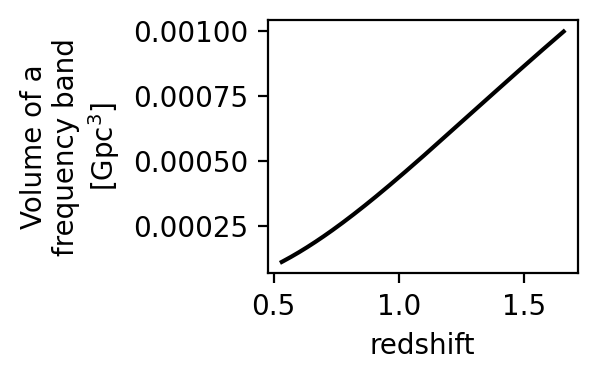

In [48]:
Vtot = 4*np.pi/3 * (cosmo.comoving_distance(z+dz/2)**3 - cosmo.comoving_distance(z-dz/2)**3).value * (np.radians(ra_size)*np.radians(dec_size))
fig, ax = plt.subplots(figsize=(3,2), dpi=200) 
ax.plot(z,Vtot/1e9,'k')
ax.set_ylabel('Volume of a\nfrequency band\n[$\\rm Gpc^3$]')
ax.set_xlabel('redshift')
fig.tight_layout()